# 75% - #1 incomplete, #2 incomplete, #3 should be negative, #4 incomplete, #5 no explanation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/GitHub/
%cd 'soil-physics-theory'
%cd 'content/chapter-5'

Mounted at /content/drive
/content/drive/MyDrive/GitHub
/content/drive/MyDrive/GitHub/soil-physics-theory
/content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-5


In [ ]:
##Chapter_5.1

##Effects of bulk density, temperature and solid-phase dielectric permittivity on the calculated water content using the Dielectric Mixing Model


#Soil temperature was changed from 20 to 22 [C]
#Bulk density was changed from 1200 to 1000 [Kg/m^3]

Soil temperature (C):22
Bulk density (kg/m^3):1000
Permittivity of soil solids (-): 4
File name:TDR/example.dat
Water content from mixing model
0.1684100348251389


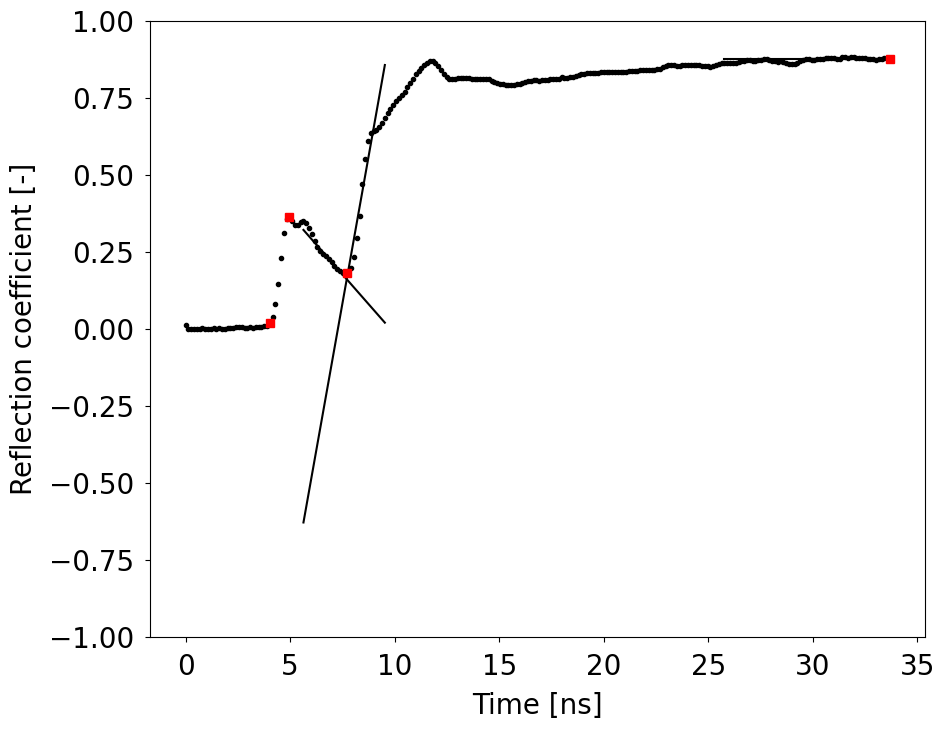

<Figure size 640x480 with 0 Axes>

In [ ]:
run main.py

In [ ]:
##Chapter_5.2

##Effect of soil water temperature on dielectric permittivity

#Answer: Dielectric permittivity of water is temperature-dependent.
#If the temperature of soil water is increased, bulk dielectric permittivity decreases.
#Estimated moisture content must go up to compensate the decrease in the bulk dielectric permittivity.

from __future__ import print_function, division
from PSP_TTwaterContent import *

print("Liquid permittivities = ", "%.2f, %.2f, %.2f, %.2f" %(getLiquidPermittivity(0),
      getLiquidPermittivity(24),
      getLiquidPermittivity(26),
      getLiquidPermittivity(100)))         #[degree Celcius]



ModuleNotFoundError: No module named 'PSP_TTwaterContent'

In [ ]:
##Chapter_5.3

##Matric potential calculation (kPa)

from __future__ import print_function, division
import math
import numpy as np

pore_diameter = 10                  #[micrometer]
temperature = 20                    #[degree Celcius]
surface_tension = 72.75 * 10**-3    #[N/m]
liquid_density = 1027.8             #[kg/m**3]
contact_angle = 0                   #assumed value
pore_diameter /= 2000000            #converts from diameter to radius and from micrometer to m

matric_potential = (2 * surface_tension * np.cos(contact_angle))/(liquid_density * pore_diameter)    #Equation 5.18
print("Absolute matric potential =", "%.2f" %(matric_potential), "kPa")

Absolute matric potential = 28.31 kPa


In [ ]:
##Chapter_5.4

#Total soil water calculation in a given profile

from __future__ import print_function, division
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as image
import numpy as np
import PSP_soil as soil
from PSP_integration import qsimp
from main_col_water import*

main()


NameError: name 'Soil' is not defined

1  Campbell
2  van Genuchten
3  van Genuchten with m = 1-1/n restriction
4  Ippisch-van Genuchten
5  Campbell-Ippisch-van Genuchten

Fitting
iterations nr: 27
sum of squared residuals: 0.003341256975857318

thetaS =  0.3751
AirEntry =  6.979975479773167
b =  4.372561079278036


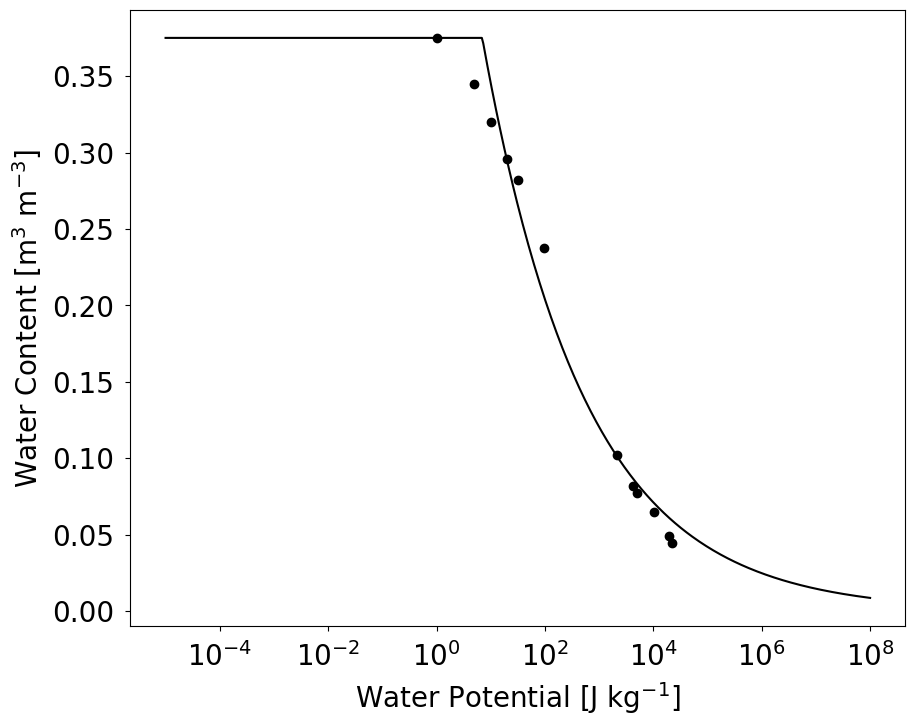

1  Campbell
2  van Genuchten
3  van Genuchten with m = 1-1/n restriction
4  Ippisch-van Genuchten
5  Campbell-Ippisch-van Genuchten

Fitting
iterations nr: 100
sum of squared residuals: 7.973940443055363e-05

thetaS =  0.40204161633561925
thetaR =  0.0
alpha =  0.014153205522067374
n =  0.5210880606716829
m =  0.702983793557867


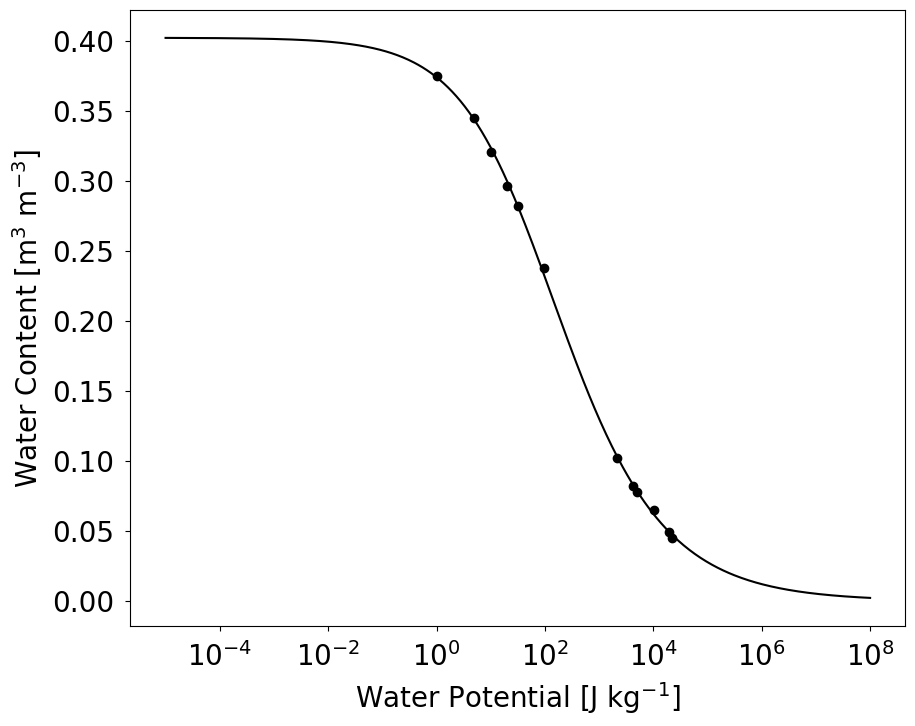

1  Campbell
2  van Genuchten
3  van Genuchten with m = 1-1/n restriction
4  Ippisch-van Genuchten
5  Campbell-Ippisch-van Genuchten

Fitting
iterations nr: 24
sum of squared residuals: 0.0009296594038476018

thetaS =  0.3751
thetaR =  0.0
alpha =  0.08376208123187162
n =  1.2551488077072979


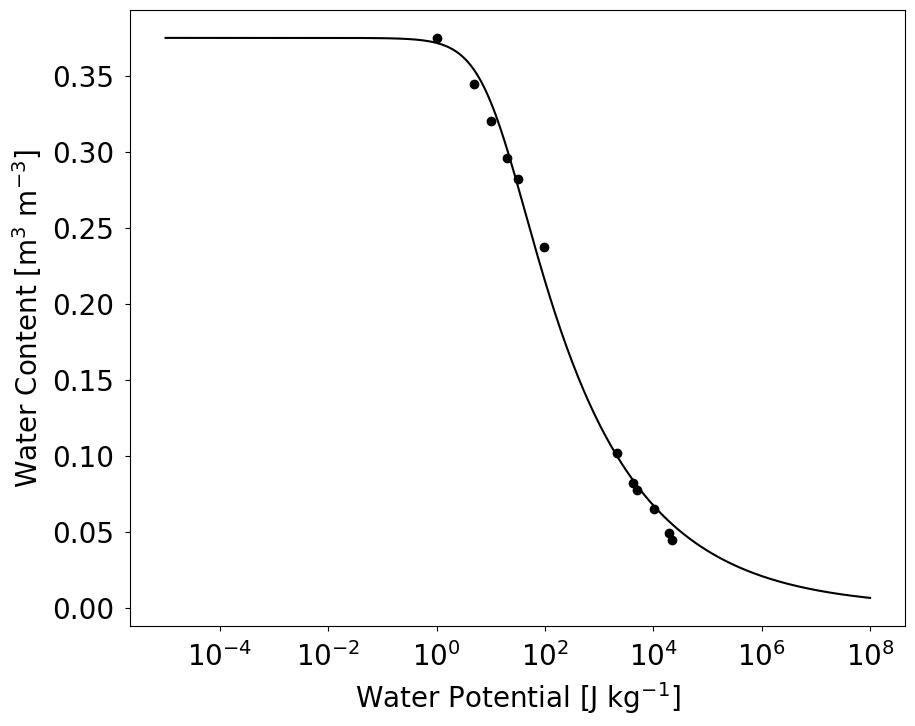

1  Campbell
2  van Genuchten
3  van Genuchten with m = 1-1/n restriction
4  Ippisch-van Genuchten
5  Campbell-Ippisch-van Genuchten

Fitting
iterations nr: 42
sum of squared residuals: 0.003627813193729772

thetaS =  0.37532275104099866
AirEntry =  20.0
b =  7.08858658449631


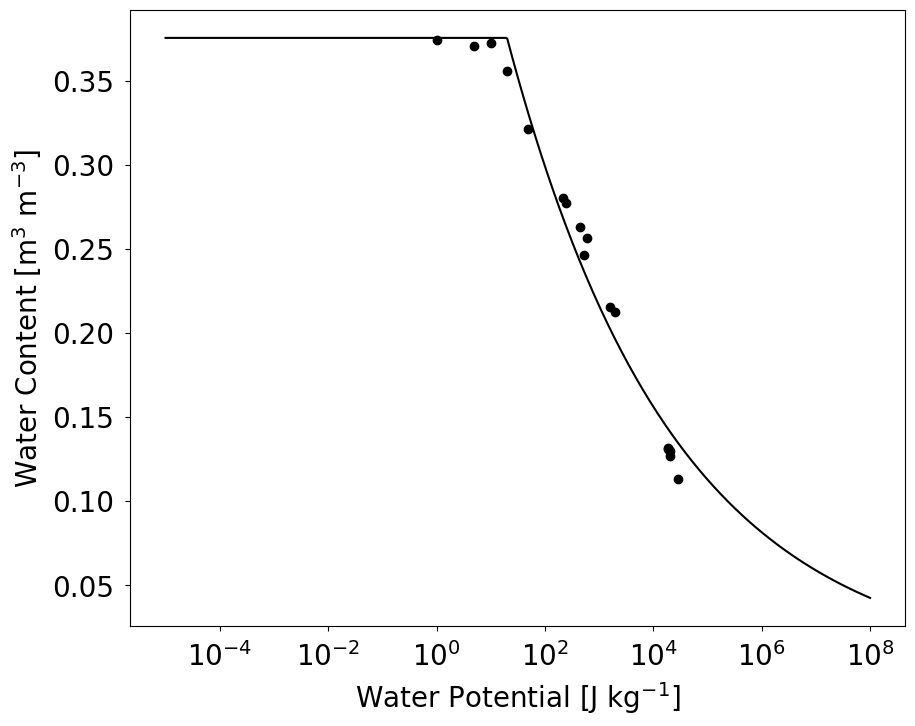

1  Campbell
2  van Genuchten
3  van Genuchten with m = 1-1/n restriction
4  Ippisch-van Genuchten
5  Campbell-Ippisch-van Genuchten

Fitting
iterations nr: 54
sum of squared residuals: 0.000673247381547459

thetaS =  0.38625730308168754
thetaR =  0.0
alpha =  0.01
n =  0.6541139547256609
m =  0.31076862051207305


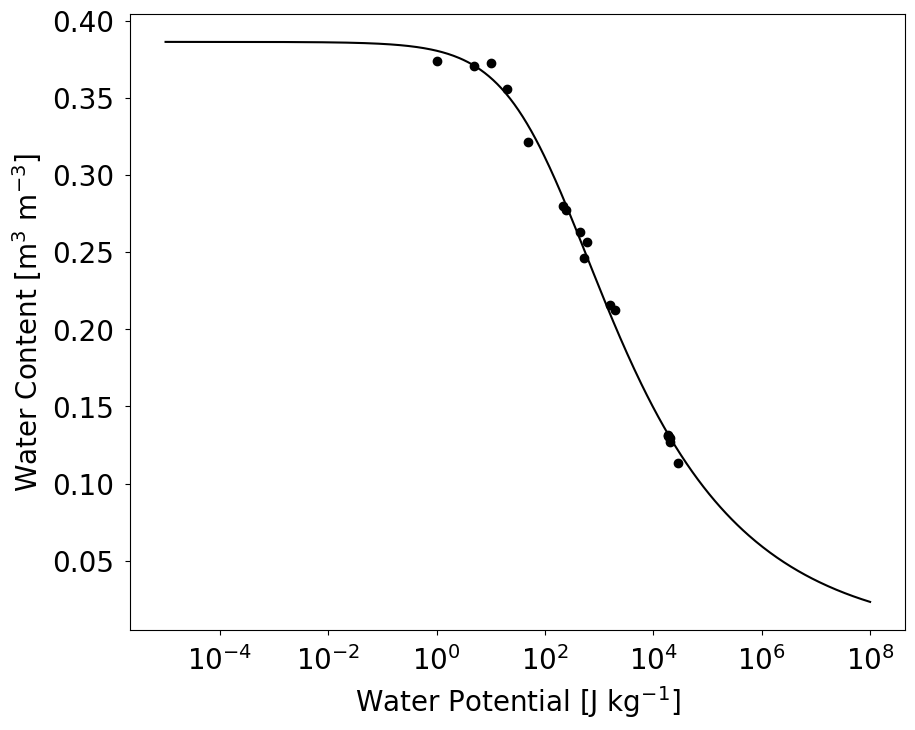

1  Campbell
2  van Genuchten
3  van Genuchten with m = 1-1/n restriction
4  Ippisch-van Genuchten
5  Campbell-Ippisch-van Genuchten

Fitting
iterations nr: 35
sum of squared residuals: 0.0011842780818773484

thetaS =  0.3739
thetaR =  0.0
alpha =  0.019679438251458126
n =  1.1721681843698057


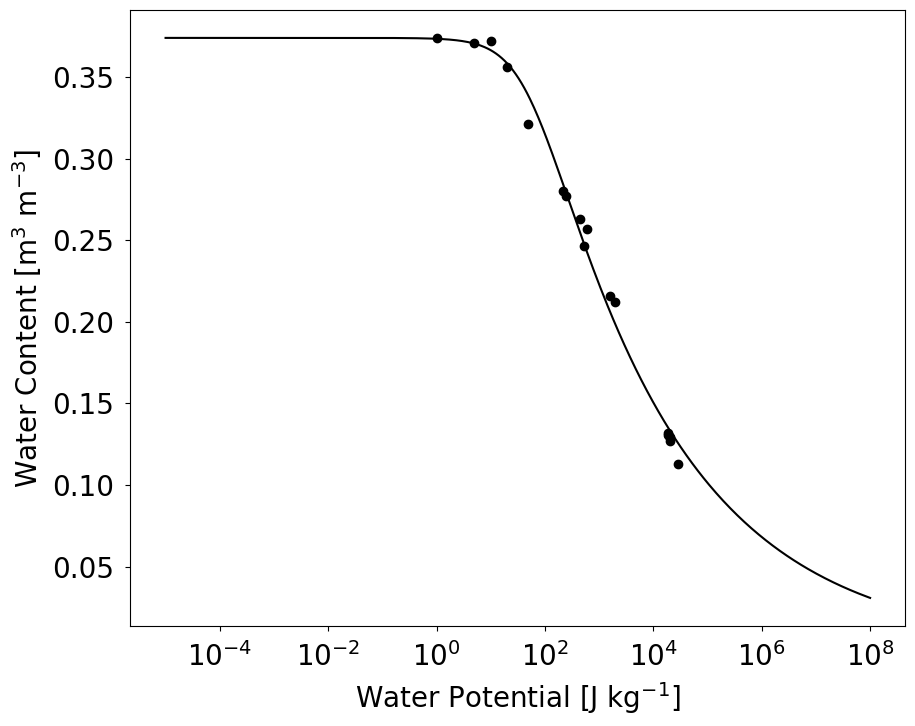

In [ ]:
##Chapter_5.5

from main import main
from main_stats import main_stats

file_str = {'clay.txt','loam.txt'}
model = [1,2,3]
for i in file_str:
  for k in model:
    main(i,k)



In [ ]:
##Chapter_5.6

#Soil water content at different matric potentials using van Genucthen's Equation

from __future__ import print_function, division
import math

alpha = 0.15                    #parameter that is inversely related to the air entry potential
n = 1.35                        #pore size distribution index
m = 1-(1/n)                     #parameter
theta_r = 0.01
theta_s = 0.46
matric_potential1 = 33          #kPa (absolute value)
matric_potential2 = 1500        #kPa (absolute value)

vwc_33 = theta_r + (theta_s - theta_r) * (1/(1 + (alpha * matric_potential1)**n)**m)       #Equation_5.29
vwc_1500 = theta_r + (theta_s - theta_r) * (1/(1 + (alpha * matric_potential2)**n)**m)     #Equation_5.29
paw = vwc_33 - vwc_1500
print("vwc @ -33 kPa =", "%.2f" %(vwc_33), "m^3/m^3")
print("vwc @ -1500 kPa =", "%.2f" %(vwc_1500), "m^3/m^3")
print("PAW =","%.2f" %(paw), "m^3/m^3")

vwc @ -33 kPa = 0.26 m^3/m^3
vwc @ -1500 kPa = 0.08 m^3/m^3
PAW = 0.18 m^3/m^3


In [ ]:
##Chapter_5.7

Derivation of the capacity for Campbell's equation by computing the derivatives of the two functions with respect to ψ:

θ=θs(ψs/ψ)b

We differentiate both sides with respect to ψ:

d/dψ[θ]=d/dψ[θs(ψs/ψ)b]

Using the chain rule, we get:

dθ/dψ=θs∗b∗(ψs/ψ)(b−1)∗(−ψs/ψ2)

dθ/dψ=ψsb∗θs∗(ψs/ψ)(b−1)

So, the derivative of the Campbell equation with respect to soil water potential ψ is:

dθ/dψ=ψsb∗θs∗(ψs/ψ)(b−1)

This derivative describes how the soil water content changes with respect to changes in soil water potential.

Derivation of the van Genuchten’s equation by computing the derivatives of the two functions with respect to ψ:

d/dθ(θr+(θs−θr)(1+(αψ)n)−m)

=dψ/dθ(θr+(θs−θr)(1+(αψ)n)−m)

=(θs−θr)∗dψ/d(1+(αψ)n)−m

Using the chain rule, we get:

=(θs−θr)∗(−m)∗(1+(αψ)n)(−m−1)∗dψ/d(1+(αψ)n)

=−(θs−θr)∗(αψ)n∗(1+(αψ)n)(−m−1)∗dψ/d(1+(αψ)n)

Differentiating 1 + (αψ)^n, we obtain:

=−(θs−θr)∗(αψ)n∗(1+(αψ)n)(−m−1)∗nαn(αψ)(n−1)

=−mnα(θs−θr)(αψ)(n−1)(1+(αψ)n)(−m−1)

Therefore, the full differentiation of (θ_r + (θ_s - θ_r) (1 + (αψ)^n) - m) with respect to ψ is:

=−mnα(θs−θr)(αψ)(n−1)(1+(αψ)n)(−m−1)